In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv(r"C:\Users\U6056186\Downloads\titanic_toy.csv")

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [8]:
df.isnull().mean()*100


Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [9]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [11]:
age_median = X_train['Age'].median()
age_mean = X_train['Age'].mean()

fare_median = X_train['Fare'].median()
fare_mean = X_train['Fare'].mean()


In [12]:
X_train['age_median'] = X_train['Age'].fillna(age_median)
X_train['age_mean'] = X_train['Age'].fillna(age_mean)


X_train['fare_median'] = X_train['Fare'].fillna(age_median)
X_train['fare_mean'] = X_train['Fare'].fillna(age_mean)


In [14]:
X_train.sample(5)

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
449,52.0,30.5000,0,52.0,52.000000,30.5000,30.500000
515,47.0,34.0208,0,47.0,47.000000,34.0208,34.020800
351,NaN,35.0000,0,28.0,29.498846,35.0000,35.000000
763,36.0,NaN,3,36.0,36.000000,28.0000,29.498846
234,24.0,10.5000,0,24.0,24.000000,10.5000,10.500000


In [17]:
print('Original Age var',X_train['Age'].var())
print('age_median var',X_train['age_median'].var())
print('age_mean var',X_train['age_mean'].var())

print('Original Fare var',X_train['Fare'].var())
print('age_median fare_median',X_train['fare_median'].var())
print('age_mean fare_mean',X_train['fare_mean'].var())

Original Age var 210.2517072477438
age_median var 169.20731007048096
age_mean var 168.8519336687225
Original Fare var 2761.031434948639
age_median fare_median 2622.2135607276828
age_mean fare_mean 2621.6705110298403


<Axes: ylabel='Density'>

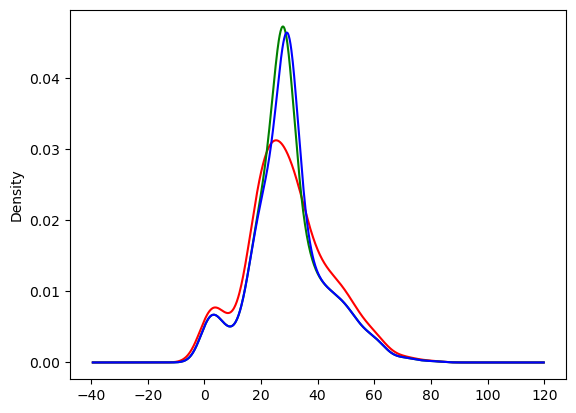

In [32]:
fig = plt.figure()
ax= fig.add_subplot(111)


X_train['Age'].plot.density(color='r',ax=ax)
X_train['age_median'].plot.density(color='g',ax=ax)
X_train['age_mean'].plot.density(color='b',ax=ax)


<Axes: ylabel='Density'>

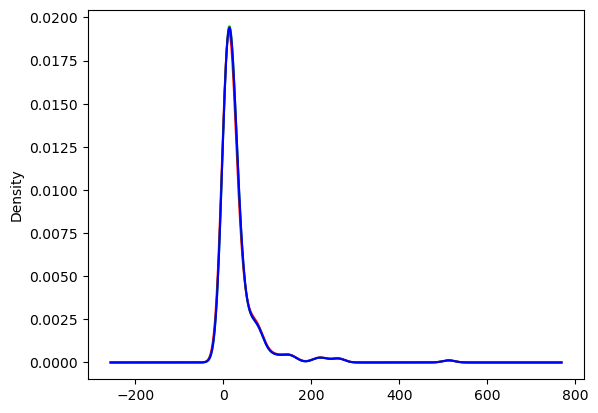

In [33]:
fig = plt.figure()
ax= fig.add_subplot(111)


X_train['Fare'].plot.density(color='r',ax=ax)
X_train['fare_median'].plot.density(color='g',ax=ax)
X_train['fare_mean'].plot.density(color='b',ax=ax)


In [35]:
X_train.cov()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.916562,71.008529
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.661074,17.659866
age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,60.458269,60.538695
age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.952682,57.026540
fare_median,70.916562,2761.031435,17.661074,60.458269,56.952682,2622.213561,2621.888037
fare_mean,71.008529,2761.031435,17.659866,60.538695,57.026540,2621.888037,2621.670511


In [36]:
X_train.corr()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088561,0.088692
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204985,0.204992
age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.090764,0.090894
age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.085591,0.085711
fare_median,0.088561,1.000000,0.204985,0.090764,0.085591,1.000000,0.999979
fare_mean,0.088692,1.000000,0.204992,0.090894,0.085711,0.999979,1.000000


<Axes: >

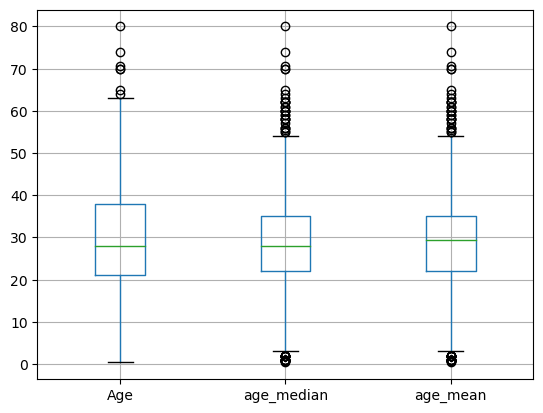

In [41]:
X_train[['Age', 'age_median', 'age_mean']].boxplot()

<Axes: >

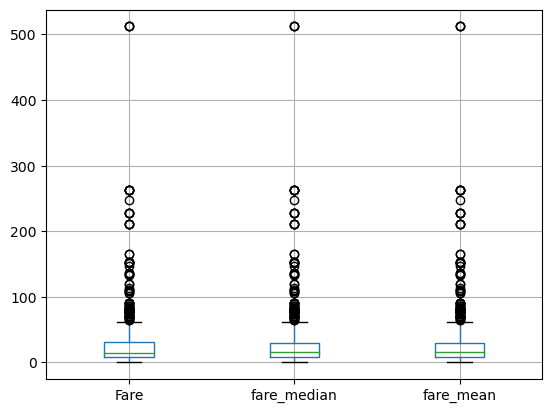

In [43]:
X_train[['Fare', 'fare_median','fare_mean']].boxplot()

# SKLEAR

In [44]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [46]:
X_train.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


In [45]:
imp1 = SimpleImputer(strategy='median')
imp2= SimpleImputer(strategy='mean')

In [47]:
trf= ColumnTransformer([('imp1',imp1,['Age']),('imp2',imp2,['Fare'])],
                       remainder='passthrough')

In [48]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imp2', SimpleImputer(), ['Fare'])])

In [51]:
trf.named_transformers_['imp1'].statistics_

array([28.])

In [52]:
trf.named_transformers_['imp2'].statistics_

array([32.51778772])

In [53]:
X_train = trf.transform(X_train)
X_test =trf.transform(X_test)

In [54]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])

# Arbitrary Values Imputation

In [55]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [56]:
age_99 = X_train['Age'].fillna(99)
age_1 = X_train['Age'].fillna(1)

fare_99 = X_train['Fare'].fillna(99)
fare_1 = X_train['Fare'].fillna(1)